# Color Transformation


#### Overview
Dalam tugas ini akan dilakukan transformasi warna GGB pada 3 buah citra dengan metode yang didapat dari penelitian berikut

Hegde, R.B., Prasad, K., Hebbar, H. et al. Multimed Tools Appl (2019) 78: 17879. https://doi.org/10.1007/s11042-018-7107-x
dengan judul "Development of a robust algorithm for detection of nuclei of white blood cells in peripheral blood smear images"

#### Tahapan transformasi warna GGB adalah sebagai berikut
1. Masukkan gambar I 
2. Memisahkan komponen RGB
3. Normalisasi komponen G dengan cara semua nilai komponen G dibagi rata-rata nilai komponen G
4. Melakukan perbaikan kontras komponen G
5. Normalisasi komponen B dengan cara semua nilai komponen B dibagi rata-rata nilai komponen B
6. Gabungkan komponen G, G, B menjadi sebuah citra

#### Berikut merupakan tampilan citra sebelum ditransformasi ke GGB

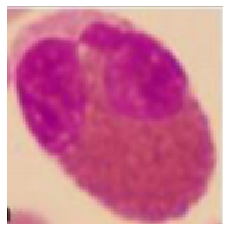

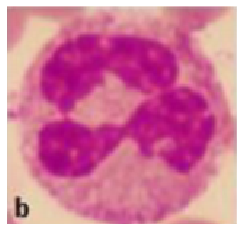

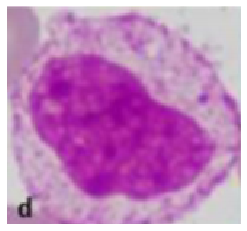

<Figure size 432x288 with 0 Axes>

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

images = [cv2.cvtColor(cv2.imread('WBC1.png'),cv2.COLOR_BGR2RGB), 
        cv2.cvtColor(cv2.imread('wbc2.png'),cv2.COLOR_BGR2RGB),
        cv2.cvtColor(cv2.imread('WBC3.png'),cv2.COLOR_BGR2RGB)]


for i in images:
    plt.axis("off")
    plt.imshow(i)
    plt.figure()




#### Berikut merupakan fungsi untuk mengubah citra RGB menjadi citra GGB

In [3]:
def convert_to_GGB(img):
    #cari ukuran gambar
    w,h,c = img.shape
    for i in range(w):
        for j in range(h):
            #set kontras pada komponen g
            g_contrast = img[i][j][1]*1.7
            if g_contrast>255:
                img[i][j][1] = 255
            else:
                img[i][j][1] = g_contrast
            #samakan komponen R dan G
            img[i][j][2] = img[i][j][1]

    return img

#### Berikut merupakan hasil citra GGB

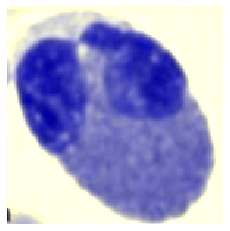

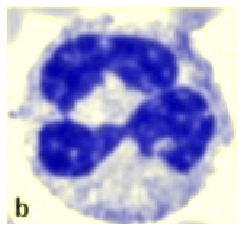

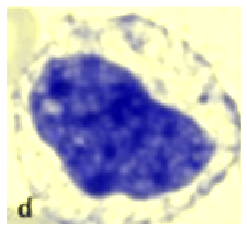

<Figure size 432x288 with 0 Axes>

In [4]:
ggb_images = []
for img in images:
    ggb_images.append(cv2.cvtColor(convert_to_GGB(img),cv2.COLOR_BGR2RGB))

for img in ggb_images:
    plt.axis("off")
    plt.imshow(img)
    plt.figure()


Pada hasil gambar GGB di atas, dapat dilihat bahwa komponen merah sudah hilang dan bagian inti sel (nukleus) tampak lebih kontras

#### Tujuan dari transformasi yang dilakukan

Secara umum, tujuan dari riset tersebut adalah mengembangkan metode yang handal untuk mendeteksi inti sel dari sel darah putih pada citra olesan darah. Salah satu metode prapemrosesan yang dilakukan dalam penelitian adalah transformasi warna ke GGB. Transformasi warna ke GGB mengubah segmen warna R pada citra RGB dengan segmen warna G. Tujuan transformasi warna dilakukan adalah meningkatkan kejelasan inti sel (nukleus) sel darah putih dan menghilangkan komponen warna merah pada citra. Metode ini juga meningkatkan kontras inti sel dengan gambar latar belakang.

Penulis menggunakan metode ini agar lebih "robust" dalam mendeteksi nukleus sel darah putih. Seberapa "robust" metode tersebut diujikan dengan variasi citra yang diubah-ubah tingkatan kecerahannya. Hasil akhir dari pengujian metode tersebut menyatakan bahwa metode yang diajukan memiliki hasil yang paling baik dibanding metode lain. Pengujian dilakukan dengan similarity measure dan mendapatkan hasil rata-rata sebesar 0,97. 